### Players Skills plot according to their scores
    Following part of analysis to show players skills in fig format.

In [11]:
from matplotlib.pyplot import GridSpec
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

import missingno as msno
import pandas_profiling

from sklearn.datasets import make_blobs
import time

In [12]:
fifa=pd.read_csv('fifa19_data.csv')

In [20]:
players_name='ID'
players_bio=fifa[['Name','Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [21]:
def get_subgroup(dataframe, g_index, g_columns):
    """Helper function that creates a sub-table from the columns and runs a quick uniqueness test."""
    g = dataframe.groupby(g_index).agg({col:'nunique' for col in g_columns})
    if g[g > 1].dropna().shape[0] != 0:
        print("Warning: you probably assumed this had all unique values but it doesn't.")
    return dataframe.groupby(g_index).agg({col:'max' for col in g_columns})

In [22]:
players = get_subgroup(fifa, players_name, players_bio)
players.head()

,Name,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,,,,,,,,,,,,,,,,,,,,,
16,Luis García,68.0,64.0,61.0,76.0,68.0,69.0,79.0,79.0,71.0,...,75.0,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0
41,Iniesta,77.0,70.0,54.0,90.0,74.0,90.0,80.0,70.0,85.0,...,71.0,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0
80,E. Belözoğlu,80.0,68.0,43.0,86.0,69.0,78.0,83.0,80.0,87.0,...,85.0,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0
164,G. Pinzi,63.0,53.0,62.0,69.0,61.0,66.0,58.0,54.0,64.0,...,65.0,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0
657,D. Vaughan,64.0,59.0,58.0,72.0,57.0,62.0,68.0,67.0,68.0,...,66.0,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0


In [23]:
def save_subgroup(dataframe, g_index, subgroup_name, prefix='players_Skills_'):
    save_subgroup_filename = "".join([prefix, subgroup_name, ".csv.gz"])
    dataframe.to_csv(save_subgroup_filename, compression='gzip', encoding='UTF-8')
    test_df = pd.read_csv(save_subgroup_filename, compression='gzip', index_col=g_index, encoding='UTF-8')
    # Test that we recover what we send in
    if dataframe.equals(test_df):
        print("Test-passed: we recover the equivalent subgroup dataframe.")
    else:
        print("Warning -- equivalence test!!! Double-check.")

In [24]:

save_subgroup(players, players_name, "players")

Test-passed: we recover the equivalent subgroup dataframe.


In [25]:
def load_subgroup(filename, index_col=[0]):
    return pd.read_csv(filename, compression='gzip', index_col=index_col)

In [26]:
players = load_subgroup("players_Skills_players.csv.gz")

In [32]:
players

,Name,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,,,,,,,,,,,,,,,,,,,,,
16,Luis García,68.0,64.0,61.0,76.0,68.0,69.0,79.0,79.0,71.0,...,75.0,79.0,70.0,43.0,40.0,9.0,12.0,13.0,11.0,11.0
41,Iniesta,77.0,70.0,54.0,90.0,74.0,90.0,80.0,70.0,85.0,...,71.0,89.0,67.0,57.0,56.0,6.0,13.0,6.0,13.0,7.0
80,E. Belözoğlu,80.0,68.0,43.0,86.0,69.0,78.0,83.0,80.0,87.0,...,85.0,80.0,65.0,67.0,60.0,7.0,11.0,7.0,14.0,8.0
164,G. Pinzi,63.0,53.0,62.0,69.0,61.0,66.0,58.0,54.0,64.0,...,65.0,68.0,74.0,71.0,66.0,5.0,15.0,7.0,6.0,13.0
657,D. Vaughan,64.0,59.0,58.0,72.0,57.0,62.0,68.0,67.0,68.0,...,66.0,82.0,59.0,66.0,62.0,6.0,9.0,10.0,9.0,7.0
768,Felipe,34.0,20.0,74.0,62.0,19.0,44.0,49.0,21.0,64.0,...,35.0,68.0,77.0,80.0,76.0,11.0,6.0,8.0,9.0,5.0
1179,G. Buffon,13.0,15.0,13.0,37.0,17.0,26.0,20.0,13.0,35.0,...,22.0,70.0,13.0,11.0,11.0,88.0,87.0,74.0,90.0,83.0
2147,M. Stekelenburg,18.0,11.0,14.0,39.0,11.0,12.0,13.0,13.0,37.0,...,23.0,59.0,9.0,15.0,14.0,71.0,72.0,76.0,73.0,73.0
2335,A. Wilbraham,49.0,62.0,75.0,68.0,56.0,49.0,48.0,42.0,41.0,...,68.0,69.0,24.0,20.0,19.0,12.0,13.0,10.0,10.0,9.0


In [286]:
def pol_plo(df,p=0):
    df1=df.iloc[p,1:16]
    n=df.iloc[p][0]
    radians = np.linspace(0, 2 * np.pi, num=15,endpoint=True)
    ax1=plt.figure(figsize=(8, 8))
    ax1=plt.subplot(111,polar=True)
    ax1.plot(radians,df1,label=n,color='xkcd:salmon')
    plt.grid(True)
    plt.legend()
    plt.show()

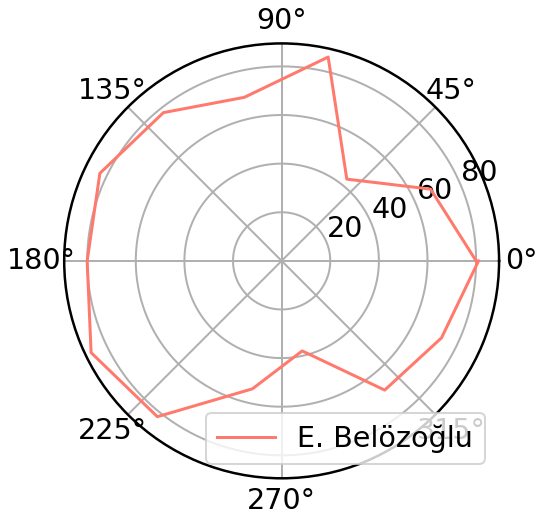

In [294]:
pol_plo(players,p=2)